In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import model_selection
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
import time 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
import scipy as sp
from scipy import sparse


from collections import Counter
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from IPython.display import display
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
app_events = pd.read_csv('app_events_smaller.csv')
app_labels = pd.read_csv('app_labels_smaller_a.csv')
events = pd.read_csv('events_smaller.csv')
gender_age_test = pd.read_csv('gender_age_test_smaller.csv')
gender_age_train = pd.read_csv('gender_age_train_smaller.csv')
label_categories = pd.read_csv('label_categories.csv')
phone_brand_device_model = pd.read_csv('phone_brand_device_model_b.csv')

In [3]:
print('Training dataset header:')
display(gender_age_train.head())
print('Dataset shape:', gender_age_train.shape)
print('')
print('Events dataset header:')
display(events.head())
print('Dataset shape:', events.shape)
print('')
print('App events dataset header:')
display(app_events.head())
print('Dataset shape:', app_events.shape)
print('')
print('App labels dataset header:')
display(app_labels.head())
print('Dataset shape:', app_labels.shape)
print('')
print('Label categories dataset header:')
display(label_categories.head())
print('Dataset shape:', label_categories.shape)
print('')
print('Phone brand & device model dataset header:')
display(phone_brand_device_model.head())
print('Dataset shape:', phone_brand_device_model.shape)

Training dataset header:


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


('Dataset shape:', (800, 4))

Events dataset header:


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


('Dataset shape:', (30000, 5))

App events dataset header:


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


('Dataset shape:', (300000, 4))

App labels dataset header:


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


('Dataset shape:', (4500, 2))

Label categories dataset header:


,label_id,category,label_itunes_id
0,1,NaN,26
1,2,game-game type,8
2,3,game-Game themes,8
3,4,game-Art Style,8
4,5,game-Leisure time,8


('Dataset shape:', (930, 3))

Phone brand & device model dataset header:


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


('Dataset shape:', (80000, 3))


In [4]:
app_events.shape

(300000, 4)

In [5]:
app_events_cleaned = app_events.drop_duplicates()

In [6]:
app_events.shape

(300000, 4)

In [7]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


### Most apps intalled

In [8]:
app_events_installed = (app_events
      .groupby('app_id')
      .is_installed.agg({'Sum_Installed': np.sum}))

/home/swisswaygo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
app_events_installed.sort_values(by='Sum_Installed', ascending=False, inplace=True)

In [10]:
app_events_installed.head()

,Sum_Installed
app_id,
8693964245073640147,10484
5927333115845830913,8198
4348659952760821294,7334
628020936226491308,5674
3433289601737013244,3412


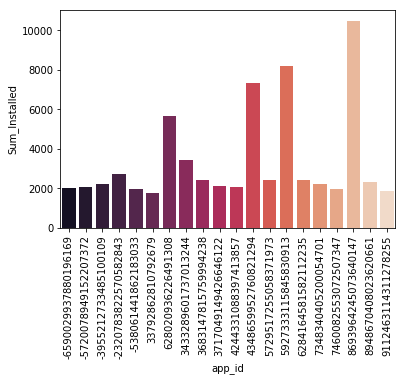

In [11]:
app_events_installed_barplot = sns.barplot(x=app_events_installed[0:20].index, 
                                           y=app_events_installed.Sum_Installed[0:20], 
                                           data=app_events_installed, palette="rocket")

app_events_installed_barplot.set_xticklabels(app_events_installed_barplot.get_xticklabels(), rotation=90)
plt.show()

In [12]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


### Most active apps

In [13]:
app_events_active = (app_events
                     .groupby('app_id')
                     .is_active.agg({'Is_Active': np.sum}))

/home/swisswaygo/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
app_events_active.sort_values(by='Is_Active', ascending=False, inplace=True)

In [15]:
app_events_active.head()

,Is_Active
app_id,
8693964245073640147,8350
5927333115845830913,5614
4348659952760821294,3842
3433289601737013244,3412
628020936226491308,3155


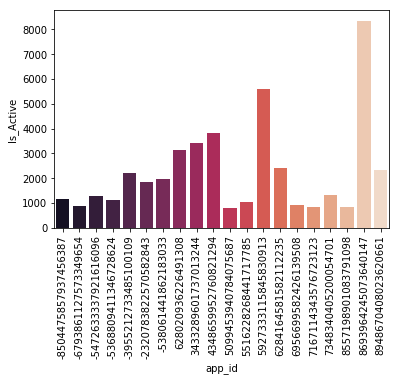

In [16]:
app_events_active_barplot = sns.barplot(x=app_events_active[0:20].index, 
                                        y=app_events_active.Is_Active[0:20], 
                                        data=app_events_active, 
                                        palette="rocket")

app_events_active_barplot.set_xticklabels(app_events_active_barplot.get_xticklabels(), rotation=90)
plt.show()

### Exploring gender and age

In [17]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [18]:
gender_age_train.device_id.describe()

count    8.000000e+02
mean     1.870455e+17
std      5.441497e+18
min     -9.216966e+18
25%     -4.781568e+18
50%      1.894887e+17
75%      5.109201e+18
max      9.219480e+18
Name: device_id, dtype: float64

In [19]:
gender_age_train.shape

(800, 4)

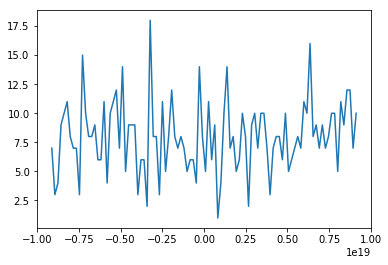

In [20]:
y,binEdges=np.histogram(gender_age_train.device_id,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.show()

#### Gender distribution

M    540
F    260
Name: gender, dtype: int64


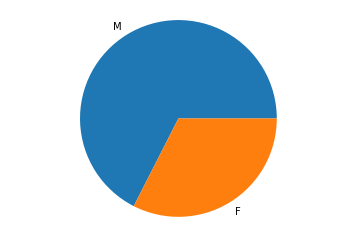

In [21]:
counts = gender_age_train.gender.value_counts()
print(counts);

plt.pie(counts.values, labels=counts.keys())
plt.axis('equal')
plt.show()

count    800.000000
mean      31.222500
std        8.647339
min       17.000000
25%       25.000000
50%       29.000000
75%       35.000000
max       78.000000
Name: age, dtype: float64


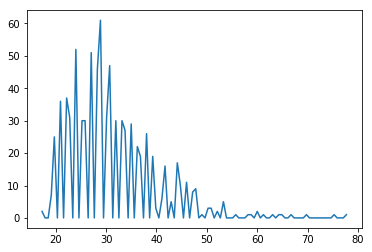

In [22]:
print(gender_age_train.age.describe())

y,binEdges=np.histogram(gender_age_train.age,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-')
plt.show()

#### Age distribution

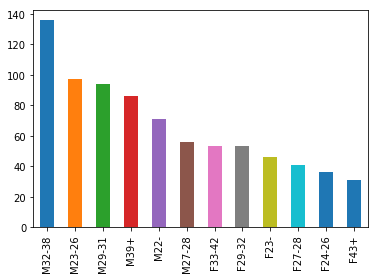

In [23]:
gender_age_train.group.value_counts().plot(kind='bar')

### Exploring test dataset

In [24]:
gender_age_test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [25]:
gender_age_test.shape

(1200, 1)

### Exploring categories dataset

In [26]:
label_categories_mapping = pd.read_csv('label_categories_mapping.csv')
display(label_categories_mapping.head())

,label_itunes_id,label_itunes_category
0,1,Books
1,2,Business
2,3,Catalogs
3,4,Education
4,5,Entertainment


### Combining App/Categories Data

In [27]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [28]:
app_label_categories = pd.merge(app_labels, label_categories, left_on='label_id', right_on='label_id')

In [29]:
app_label_categories.set_index('label_id', inplace=True)

In [30]:
app_label_categories.head()

,app_id,category,label_itunes_id
label_id,,,
251,7324884708820027918,Finance,6
251,-4494216993218550286,Finance,6
251,8756705988821000489,Finance,6
251,1061207043315821111,Finance,6
251,-1491198667294647703,Finance,6


In [31]:
label_categories_mapping = pd.read_csv('label_categories_mapping.csv')
label_categories_mapping.head()

,label_itunes_id,label_itunes_category
0,1,Books
1,2,Business
2,3,Catalogs
3,4,Education
4,5,Entertainment


In [32]:
label_categories.head()

,label_id,category,label_itunes_id
0,1,NaN,26
1,2,game-game type,8
2,3,game-Game themes,8
3,4,game-Art Style,8
4,5,game-Leisure time,8


In [33]:
label_categories = pd.merge(label_categories, label_categories_mapping, left_on='label_itunes_id', right_on='label_itunes_id')

In [34]:
label_categories.head()

,label_id,category,label_itunes_id,label_itunes_category
0,1,NaN,26,Unknown
1,74,unknown,26,Unknown
2,115,unknown,26,Unknown
3,125,unknown,26,Unknown
4,126,unknown,26,Unknown


In [35]:
label_categories.set_index('label_itunes_id', inplace=True)

In [36]:
label_categories.head()

,label_id,category,label_itunes_category
label_itunes_id,,,
26,1,NaN,Unknown
26,74,unknown,Unknown
26,115,unknown,Unknown
26,125,unknown,Unknown
26,126,unknown,Unknown


In [37]:
label_categories.groupby('category').count().agg(['count', 'mean', 'min', 'max', 'sum'])

,label_id,label_itunes_category
count,833.000000,833.000000
mean,1.110444,1.110444
min,1.000000,1.000000
max,26.000000,26.000000
sum,925.000000,925.000000


In [38]:
app_labels = pd.merge(app_labels, label_categories, left_on='label_id', right_on='label_id')
app_labels.set_index('label_id', inplace=True)

In [39]:
label_categories

,label_id,category,label_itunes_category
label_itunes_id,,,
26,1,NaN,Unknown
26,74,unknown,Unknown
26,115,unknown,Unknown
26,125,unknown,Unknown
26,126,unknown,Unknown
26,248,NaN,Unknown
26,264,NaN,Unknown
26,302,unknown,Unknown
26,303,unknown,Unknown


In [40]:
app_labels.head()

,app_id,category,label_itunes_category
label_id,,,
251,7324884708820027918,Finance,Finance
251,-4494216993218550286,Finance,Finance
251,8756705988821000489,Finance,Finance
251,1061207043315821111,Finance,Finance
251,-1491198667294647703,Finance,Finance


In [41]:
app_cat_itunes_freq = app_labels.groupby("label_itunes_category").agg('count')

In [42]:
app_cat_itunes_freq.sort_values(by='category', ascending=False, inplace=True)

In [43]:
app_cat_itunes_freq.head()

,app_id,category
label_itunes_category,,
Business,3409,3409
Finance,831,831
Unknown,179,179
Reference,70,70
Lifestyle,5,5


In [44]:
app_labels_pandas = app_labels
app_labels_pandas = app_labels_pandas.sample(1000, replace=True)

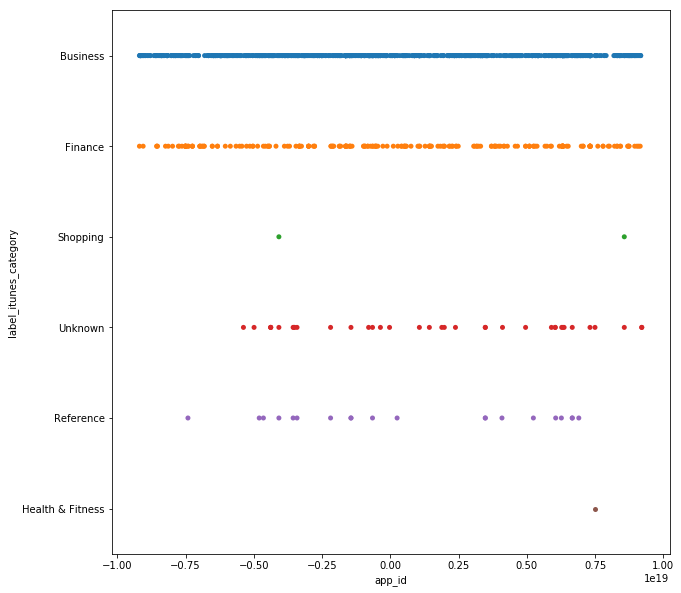

In [45]:
dimensions = (10, 10)
fig, ax = pyplot.subplots(figsize=dimensions)
sns.stripplot(x="app_id", y="label_itunes_category", data=app_labels_pandas);

### Data Transformation

In [46]:
combined_data_df = pd.merge(phone_brand_device_model, gender_age_train, left_on='device_id', right_on='device_id')

In [47]:
combined_data_df = pd.merge(combined_data_df, events, left_on='device_id', right_on='device_id')

In [48]:
combined_data_df = pd.merge(combined_data_df, app_events, left_on='event_id', right_on='event_id')

In [49]:
combined_data_df = pd.merge(combined_data_df, app_labels, left_on='app_id', right_on='app_id')

In [50]:
combined_data_df = pd.merge(combined_data_df, label_categories, left_on='label_itunes_category', right_on='label_itunes_category')

In [51]:
combined_data_df.head()

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,app_id,is_installed,is_active,category_x,label_itunes_category,label_id,category_y
0,-3352337094847398864,OPPO,R7,M,21,M22-,22635,2016-05-06 19:27:52,0.0,0.0,5927333115845830913,1,1,Property Industry 1.0,Business,69,business
1,-3352337094847398864,OPPO,R7,M,21,M22-,22635,2016-05-06 19:27:52,0.0,0.0,5927333115845830913,1,1,Property Industry 1.0,Business,216,Business Office
2,-3352337094847398864,OPPO,R7,M,21,M22-,22635,2016-05-06 19:27:52,0.0,0.0,5927333115845830913,1,1,Property Industry 1.0,Business,228,work
3,-3352337094847398864,OPPO,R7,M,21,M22-,22635,2016-05-06 19:27:52,0.0,0.0,5927333115845830913,1,1,Property Industry 1.0,Business,229,Jobs
4,-3352337094847398864,OPPO,R7,M,21,M22-,22635,2016-05-06 19:27:52,0.0,0.0,5927333115845830913,1,1,Property Industry 1.0,Business,237,store management


In [52]:
combined_data_df.shape

(4408, 17)

F    3085
M    1323
Name: gender, dtype: int64


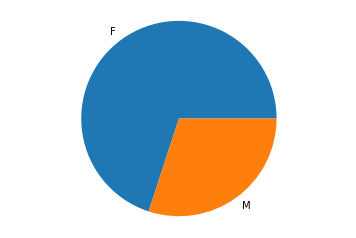

In [53]:
counts = combined_data_df.gender.value_counts()
print(counts);

plt.pie(counts.values, labels=counts.keys())
plt.axis('equal')
plt.show()

In [54]:
combined_data_df = combined_data_df.drop(combined_data_df[combined_data_df['gender'] == 'F'].sample(frac=.4).index)

In [55]:
combined_data_df.shape

(3174, 17)

In [56]:
dummy = pd.get_dummies(combined_data_df) # Transform the categorical variables into binary vectors

In [57]:
pd.set_option('display.max_columns', 10)

In [58]:
dummy.head()

,device_id,age,event_id,longitude,latitude,...,category_y_trickery,category_y_underwear,category_y_unknown,category_y_vitality,category_y_work
0,-3352337094847398864,21,22635,0.0,0.0,...,0,0,0,0,0
1,-3352337094847398864,21,22635,0.0,0.0,...,0,0,0,0,0
2,-3352337094847398864,21,22635,0.0,0.0,...,0,0,0,0,1
3,-3352337094847398864,21,22635,0.0,0.0,...,0,0,0,0,0
4,-3352337094847398864,21,22635,0.0,0.0,...,0,0,0,0,0


In [59]:
dummy.shape

(3174, 405)

In [60]:
features = dummy.drop(['gender_F', 'gender_M', 'age'], axis=1).columns

In [61]:
X = dummy[features]
Y = dummy['gender_F']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [62]:
print("normal data distribution: {}".format(Counter(Y_train)))

normal data distribution: Counter({1: 1474, 0: 1065})


1    1474
0    1065
Name: gender_F, dtype: int64


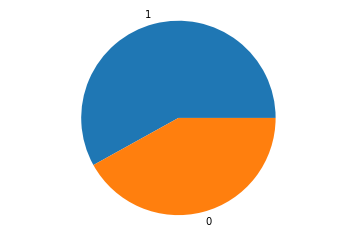

In [63]:
counts = Y_train.value_counts()
print(counts);

plt.pie(counts.values, labels=counts.keys())
plt.axis('equal')
plt.show()

In [64]:
sm = SMOTE(random_state=12, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [65]:
print("SMOTE data distribution: {}".format(Counter(Y_train)))

SMOTE data distribution: Counter({0: 1474, 1: 1474})


In [66]:
X_train.shape

(2948, 402)

In [67]:
X_validation.shape

(635, 402)

### Training and testing with GridSearchCV

#### Logistic Regression (Classification L2)

In [68]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2')

In [69]:
# Define the parameter values that should be searched# Define 
C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [70]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [71]:
# instantiate and fit the grid
grid = GridSearchCV(log_reg_model, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [72]:
# Logistic Regression
start = time.time()
grid.fit(X_train, Y_train)
log_reg_pred = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Runtime 0.58


In [73]:
# View the complete results
grid.grid_scores_

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.46167, std: 0.01538, params: {'C': 0.001},
 mean: 0.46167, std: 0.01538, params: {'C': 0.01},
 mean: 0.46167, std: 0.01538, params: {'C': 0.1},
 mean: 0.46167, std: 0.01538, params: {'C': 1},
 mean: 0.46167, std: 0.01538, params: {'C': 10},
 mean: 0.46167, std: 0.01538, params: {'C': 100},
 mean: 0.46167, std: 0.01538, params: {'C': 1000}]

In [74]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.4616689280868385
{'C': 0.001}


In [75]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2', C=1)
log_reg_model.fit(X_train, Y_train)
log_reg_pred = log_reg_model.predict(X_train)

             precision    recall  f1-score   support

   gender_F       0.48      0.73      0.58      1474
   gender_M       0.42      0.20      0.27      1474

avg / total       0.45      0.46      0.42      2948



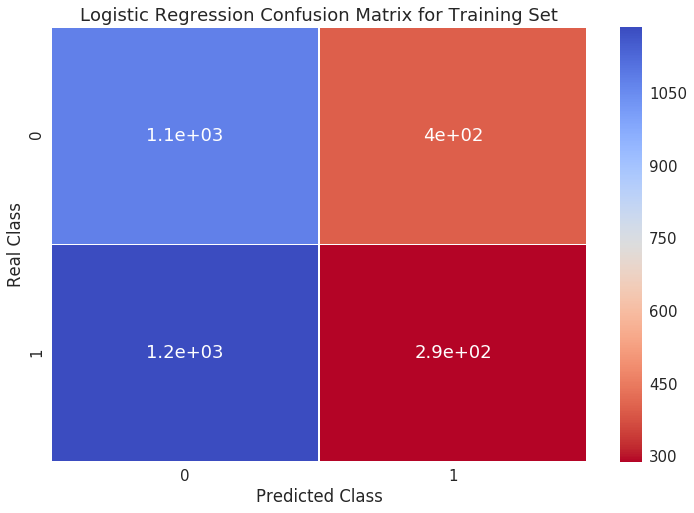

Cross Validation Accuracy Scores: 0.462(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.488(+/- 0.27)


In [76]:
# Printing classification report
print(classification_report(Y_train, log_reg_pred, target_names=['gender_F', 'gender_M']))

# Building confusion matrix
conf_matrix_train_logR = confusion_matrix(Y_train, log_reg_pred)

#creating heatmap of confusion matrix
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
sns.heatmap(conf_matrix_train_logR,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Logistic Regression Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_logR = cross_val_score(log_reg_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_logR.mean(), scores_logR.std()*2))

scores_logRTest = cross_val_score(log_reg_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_logRTest.mean(), scores_logRTest.std()*2))

#### Random Forest

In [77]:
rfc = ensemble.RandomForestClassifier()

In [78]:
# Define the parameter values that should be searched
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 4, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [79]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [1], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]}


In [80]:
# Random Forest Classifier: instantiate and fit the grid# Random 
start = time.time()
grid = GridSearchCV(rfc, param_grid, verbose=1, cv=4, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_rfc = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 4 folds for each of 432 candidates, totalling 1728 fits
Runtime 15.51


[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed:   15.5s finished


In [81]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

1.0
{'bootstrap': True, 'min_samples_leaf': 2, 'n_estimators': 1, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 6}


In [82]:
rfc = ensemble.RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, n_estimators=1)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_train)

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948



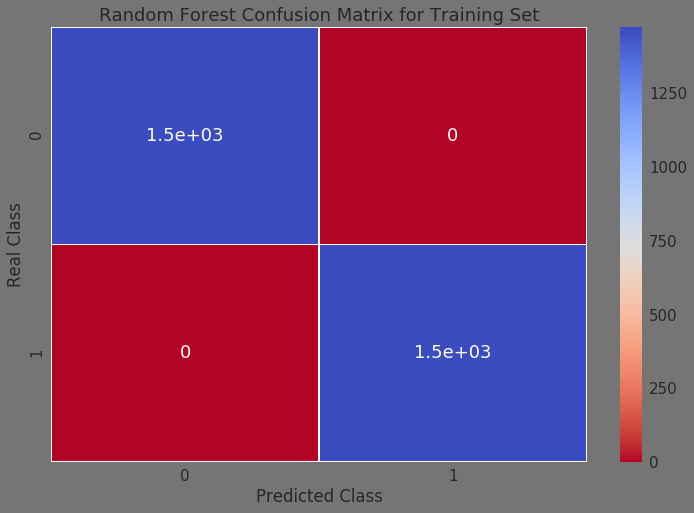

Cross Validation Accuracy Scores: 0.999(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 0.998(+/- 0.01)


In [83]:
# Print classification report
print(classification_report(Y_train, Y_pred_rfc, target_names=['gender_F', 'gender_M']))

# Building confusion matrix
conf_matrix_rfc = confusion_matrix(Y_train, Y_pred_rfc)

# Creating heatmap of confusion matrix
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
sns.heatmap(conf_matrix_rfc, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc = cross_val_score(rfc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc.mean(), scores_rfc.std()*2))

scores_rfcTest = cross_val_score(rfc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_rfcTest.mean(), scores_rfcTest.std()*2))

#### Decision Tree

In [84]:
clf = DecisionTreeClassifier()

In [85]:
# Define the parameter values that should be searched
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion' : ['gini', 'entropy']}

In [86]:
# instantiate and fit the grid
start = time.time()
grid = GridSearchCV(clf, param_grid, verbose=1, cv=4, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_clf = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
Runtime 20.05


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   20.0s finished


In [87]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

1.0
{'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 1}


In [88]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_split=10)
clf.fit(X_train, Y_train)
Y_pred_clf = clf.predict(X_train)

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948



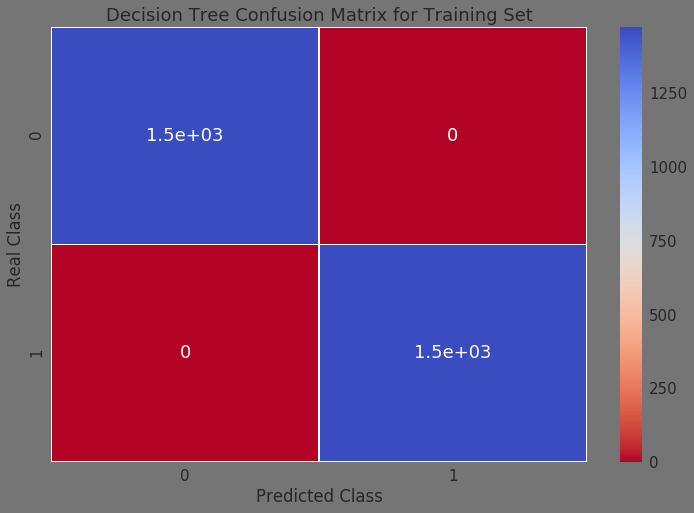

Cross Validation Accuracy Scores: 1.000(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 1.000(+/- 0.00)


In [89]:
# Print classification report
print(classification_report(Y_train, Y_pred_clf, target_names=['gender_F', 'gender_M']))

# Building confusion matrix
conf_matrix_clf = confusion_matrix(Y_train, Y_pred_clf)

# Creating heatmap of confusion matrix
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
sns.heatmap(conf_matrix_clf, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Decision Tree Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_clf = cross_val_score(clf, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_clf.mean(), scores_clf.std()*2))

scores_clfTest = cross_val_score(clf, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_clfTest.mean(), scores_clfTest.std()*2))

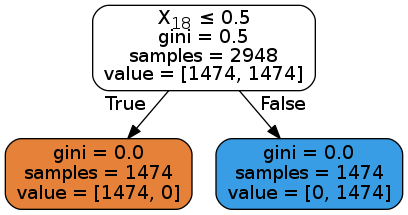

In [90]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### KNN

In [91]:
knn_model = KNeighborsClassifier()


In [92]:
# Define the parameter values that should be searched
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

In [93]:
# KNN Classifier
start = time.time()
grid = GridSearchCV(knn_model, param_grid, verbose=1, cv=4, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_knn = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   25.6s finished


Runtime 26.13


In [94]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


In [95]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_train)

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948



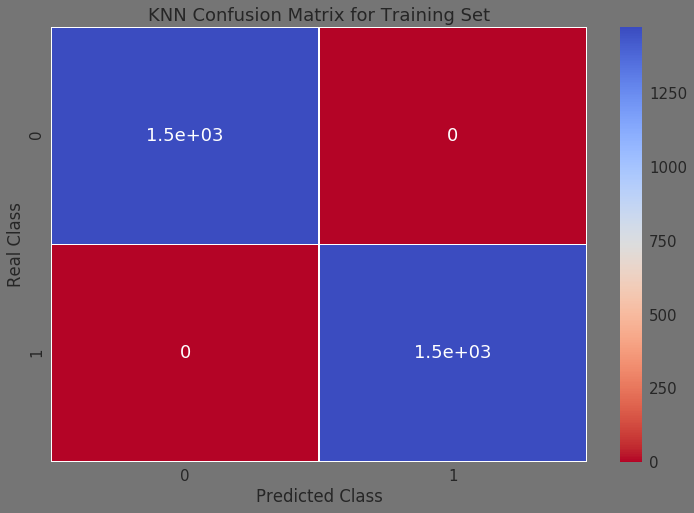

Cross Validation Accuracy Scores: 0.998(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 0.962(+/- 0.03)


In [96]:
# Print classification report
print(classification_report(Y_train, Y_pred_knn, target_names=['gender_F', 'gender_M']))

# Building confusion matrix
conf_matrix_knn = confusion_matrix(Y_train, Y_pred_knn)

# Creating heatmap of confusion matrix
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
sns.heatmap(conf_matrix_knn, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('KNN Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_knn = cross_val_score(knn_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_knn.mean(), scores_knn.std()*2))

scores_knnTest = cross_val_score(knn_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_knnTest.mean(), scores_knnTest.std()*2))

#### Ridge

In [97]:
rclass = RidgeClassifier()

In [98]:
# Define the parameter values that should be searched# Define 
param_grid = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

In [99]:
# Ridge Classifier
start = time.time()
grid = GridSearchCV(rclass, param_grid, verbose=1, cv=4, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_rclass = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 4 folds for each of 13 candidates, totalling 52 fits


/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.506143e-40
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.494609e-40
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.454391e-40
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.56319

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.042658e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.031019e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.001606e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.08287

Runtime 1.33


/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.271838e-43
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.760313e-43
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.727984e-43
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.70967

In [100]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

1.0
{'alpha': 25}


In [101]:
rclass = RidgeClassifier(alpha=0.8)
rclass.fit(X_train, Y_train)
Y_pred_rclass = rclass.predict(X_train)

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.105636e-42
  overwrite_a=True).T


             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948



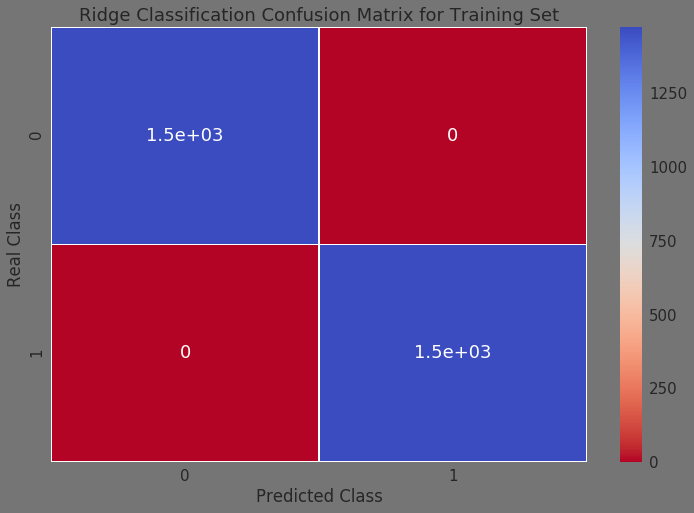

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.721714e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.883750e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.851701e-42
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.75850

Cross Validation Accuracy Scores: 1.000(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 1.000(+/- 0.00)


/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.112441e-41
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.952444e-41
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.012585e-41
  overwrite_a=True).T
/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.07378

In [102]:
# Print classification report
print(classification_report(Y_train, Y_pred_rclass, target_names=['gender_F', 'gender_M']))

# Building confusion matrix
conf_matrix_rclass = confusion_matrix(Y_train, Y_pred_rclass)

# Creating heatmap of confusion matrix
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff', 'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
sns.heatmap(conf_matrix_rclass, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Ridge Classification Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rclass = cross_val_score(rclass, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rclass.mean(), scores_rclass.std()*2))

scores_rclassTest = cross_val_score(rclass, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_rclassTest.mean(), scores_rclassTest.std()*2))

### Training and testing applying PCA

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [104]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(X_train)

In [105]:
# Create a PCA that will retain 90% of the variance
pca = PCA(n_components=0.75, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [106]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

('Original number of features:', 402)
('Reduced number of features:', 264)


In [107]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y_train)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

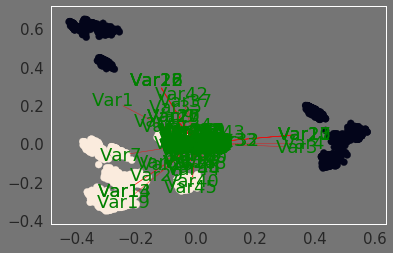

In [108]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [109]:
from sklearn.pipeline import Pipeline

#### Logistic Regression (L2)

In [110]:
pipe = Pipeline([('pca', pca), ('logistic', log_reg_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [111]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['gender_F', 'gender_M']))

scores = cross_val_score(pipe, X_train, Y_train, cv=4)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   gender_F       0.78      0.58      0.67      1474
   gender_M       0.67      0.83      0.74      1474

avg / total       0.72      0.71      0.70      2948

Cross Validation Accuracy Scores: 0.708(+/- 0.01)
Cross Validation Accuracy Scores - Test Set: 0.792(+/- 0.08)


#### Random Forest Classification

In [112]:
pipe = Pipeline([('pca', pca), ('rfc', rfc)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [113]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['gender_F', 'gender_M']))

scores = cross_val_score(pipe, X_train, Y_train, cv=4)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948

Cross Validation Accuracy Scores: 1.000(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 0.991(+/- 0.03)


#### Decision Tree Classification

In [114]:
pipe = Pipeline([('pca', pca), ('clf', clf)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [115]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['gender_F', 'gender_M']))

scores = cross_val_score(pipe, X_train, Y_train, cv=4)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948

Cross Validation Accuracy Scores: 1.000(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 0.987(+/- 0.02)


#### KNN

In [116]:
pipe = Pipeline([('pca', pca), ('knn', knn_model)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [117]:
# Printing classification report
print(classification_report(Y_train, pred, target_names=['gender_F', 'gender_M']))

scores = cross_val_score(pipe, X_train, Y_train, cv=4)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   gender_F       1.00      1.00      1.00      1474
   gender_M       1.00      1.00      1.00      1474

avg / total       1.00      1.00      1.00      2948

Cross Validation Accuracy Scores: 0.998(+/- 0.00)
Cross Validation Accuracy Scores - Test Set: 0.962(+/- 0.03)


#### Ridge

In [118]:
pipe = Pipeline([('pca', pca), ('rclass', rclass)])
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_train)

In [119]:
# Printing classification report# Printin 
print(classification_report(Y_train, pred, target_names=['gender_F', 'gender_M']))

scores = cross_val_score(pipe, X_train, Y_train, cv=4)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

scores_T = cross_val_score(pipe, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_T.mean(), scores_T.std()*2))

             precision    recall  f1-score   support

   gender_F       0.78      0.58      0.67      1474
   gender_M       0.67      0.83      0.74      1474

avg / total       0.72      0.71      0.70      2948

Cross Validation Accuracy Scores: 0.708(+/- 0.01)
Cross Validation Accuracy Scores - Test Set: 0.768(+/- 0.09)


In [120]:
X_validation.shape, Y_validation.shape


((635, 402), (635,))

In [121]:
print("# Num of Features: ", X_train.shape[1])

('# Num of Features: ', 402)


In [122]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(2948, 402)
(635, 402)
(2948,)
(635,)


### Running Neural Networks models

#### Creating independent datasets

In [123]:
X_train_NN = X_train
X_validation_NN = X_validation
Y_train_NN = Y_train
Y_validation_NN = Y_validation

In [124]:
X_train_NN_2 = X_train
X_validation_NN_2 = X_validation
Y_train_NN_2 = Y_train
Y_validation_NN_2 = Y_validation

#### Importing necessary libraries

In [125]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Activation, BatchNormalization
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.layers.advanced_activations import PReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from keras import optimizers

# Import the backend
from keras import backend as K

/home/swisswaygo/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Defining model

In [129]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (402, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    model.summary()
    
    return model

#### Creating 5 different models to ensemble

In [130]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 5)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 7)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 8)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 9)

#### Evaluating performance based on one only model

In [131]:
model_1_a = model1.fit(X_train_NN_2, Y_train_NN_2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                20150     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200       
_________________________________________________________________
activation_7 (Activation)    (None, 50)                0         
__________

In [132]:
y_pred_model_1 = model1.predict(X_validation_NN_2)

In [133]:
print('Acc: ', accuracy_score(y_pred_model_1, Y_validation_NN_2))

('Acc: ', 0.9653543307086614)


#### Evaluating performance based on ensambled models

In [134]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [135]:
%%time
ensemble_clf.fit(X_train_NN, Y_train_NN)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                20150     
_________________________________________________________________
batch_normalization_9 (Batch (None, 50)                200       
_________________________________________________________________
activation_11 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_10 (Batc (None, 50)                200       
_________________________________________________________________
activation_12 (Activation)   (None, 50)                0         
__________

Epoch 1/7
2948/2948 [==============================] - 2s 516us/step - loss: 0.2721 - acc: 0.8996
Epoch 2/7
2948/2948 [==============================] - 0s 143us/step - loss: 0.1519 - acc: 0.9488
Epoch 3/7
2948/2948 [==============================] - 0s 139us/step - loss: 0.1351 - acc: 0.9481
Epoch 4/7
2948/2948 [==============================] - 0s 141us/step - loss: 0.1309 - acc: 0.9542
Epoch 5/7
2948/2948 [==============================] - 0s 140us/step - loss: 0.1346 - acc: 0.9518
Epoch 6/7
2948/2948 [==============================] - 0s 141us/step - loss: 0.1267 - acc: 0.9556
Epoch 7/7
2948/2948 [==============================] - 0s 140us/step - loss: 0.1262 - acc: 0.9539
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 50)                20150     
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)           

VotingClassifier(estimators=[('model1', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8fc1273490>), ('model2', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8fc12734d0>), ('model3', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8fc1273550>), ('model4', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8fc2207910>), ('model5', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8fc2207a10>)],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [136]:
y_pred = ensemble_clf.predict(X_validation_NN)

/home/swisswaygo/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [137]:
print('Acc: ', accuracy_score(y_pred, Y_validation_NN))

('Acc: ', 0.9653543307086614)
